<a href="https://colab.research.google.com/github/vanditakhare/RecommendationSystem/blob/main/recommendationsys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

In [3]:
if 'amazon-product-reviews' not in os.listdir():
  check_and_install_library('opendatasets')
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/irvifa/amazon-product-reviews')

opendatasets is not installed. Installing...


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting opendatasets

Downloading opendatasets-0.1.22-py3-none-any.whl (15 kB)

Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from opendatasets) (4.66.1)

Requirement already satisfied: kaggle in /usr/local/lib/python3.10/dist-packages (from opendatasets) (1.5.16)

Requirement already satisfied: click in /usr/local/lib/python3.10/dist-packages (from opendatasets) (8.1.7)

Requirement already satisfied: six>=1.10 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (1.16.0)

Requirement already satisfied: certifi in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2023.11.17)

Requirement already satisfied: python-dateutil in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.8.2)

Requirement already satisfied: requests in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.31.0)

Requirement already satisfied: python-slugify in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (8.0.2)

Requirement already satisfied: urllib3 in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (2.0.7)

Requirement already satisfied: bleach in /usr/local/lib/python3.10/dist-packages (from kaggle->opendatasets) (6.1.0)

Requirement already satisfied: webencodings in /usr/local/lib/python3.10/dist-packages (from bleach->kaggle->opendatasets) (0.5.1)

Requirement already satisfied: text-unidecode>=1.3 in /usr/local/lib/python3.10/dist-packages (from python-slugify->kaggle->opendatasets) (1.3)

Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.3.2)

Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests->kaggle->opendatasets) (3.6)

Installing collected packages: opendatasets

Successfully installed opendatasets-0.1.22

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vkhare
Your Kaggle Key: ··········


100%|██████████| 109M/109M [00:01<00:00, 106MB/s]


In [57]:
df=pd.read_csv('amazon-product-reviews/ratings_Electronics.csv',names=['userId', 'productId','rating','timestamp'])

In [5]:
df.shape

(7824482, 4)

In [6]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [7]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [8]:
del df

In [9]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A1KS87Y62F2XCQ,B005VSHMSY,5.0,1328745600
1,ADZL9FMTSL5R4,B002HQWN28,5.0,1303344000
2,A2OKXUOIUOIX6C,B0002BEY0Y,4.0,1264636800
3,A2LG9ST6T7YD2X,B00264ZU76,1.0,1290729600
4,A2JQXC4IBEOZL4,B008SGX71W,2.0,1395446400


In [10]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [11]:
electronics_data.drop('timestamp',axis=1,inplace=True)

In [12]:
electronics_data.describe()

,rating
count,1.564896e+06
mean,4.010679e+00
std,1.382088e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [13]:
#handle missing values
electronics_data.isnull().sum()

userId       0
productId    0
rating       0
dtype: int64

In [14]:
electronics_data[electronics_data.duplicated()].shape[0]

0

In [15]:
electronics_data.head()

,userId,productId,rating
0,A1KS87Y62F2XCQ,B005VSHMSY,5.0
1,ADZL9FMTSL5R4,B002HQWN28,5.0
2,A2OKXUOIUOIX6C,B0002BEY0Y,4.0
3,A2LG9ST6T7YD2X,B00264ZU76,1.0
4,A2JQXC4IBEOZL4,B008SGX71W,2.0


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

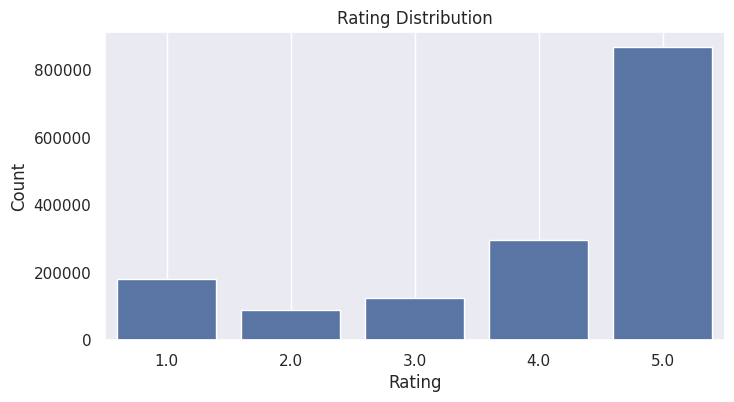

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

In [17]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1225318
Total unique products :  237868


In [18]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     109
A3OXHLG6DIBRW8    100
ADLVFFE4VBT8       98
A6FIAB28IS79       97
A1ODOGXEYECQQ8     88
Name: rating, dtype: int64

In [19]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 29 


In [20]:
data=electronics_data.groupby('productId').filter(lambda x:x['rating'].count()>=50)

In [21]:
data.head()

,userId,productId,rating
1,ADZL9FMTSL5R4,B002HQWN28,5.0
8,A24PH4KLIKUB48,B007WTAJTO,5.0
9,A22D2DHLU0DQA5,B001FA1O18,5.0
10,A3ULSLFN1CGH0P,B003FVVMS0,5.0
12,A1RUNTPXMGN6RH,B004S7Q8CA,5.0


In [22]:
no_of_rating_per_product=data.groupby('productId')['rating'].count().sort_values(ascending=False)

In [23]:
no_of_rating_per_product.head()

productId
B0074BW614    3640
B00DR0PDNE    3359
B007WTAJTO    2776
B0019EHU8G    2479
B006GWO5WK    2407
Name: rating, dtype: int64

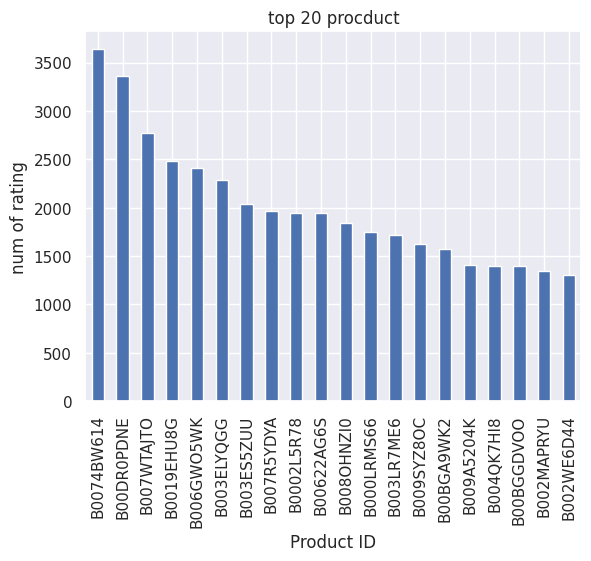

In [24]:
no_of_rating_per_product.head(20).plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('num of rating')
plt.title('top 20 procduct')
plt.show()

In [25]:
mean_rating_product_count=pd.DataFrame(data.groupby('productId')['rating'].mean())

In [26]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.579909
1400501466,3.314815
1400532655,3.659574
140053271X,4.000000
1400599997,3.403846


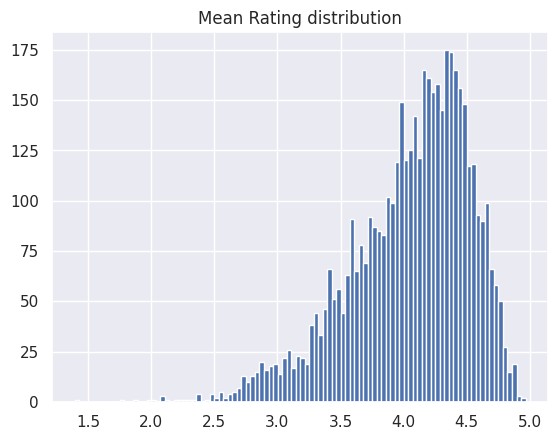

In [27]:
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [28]:
mean_rating_product_count['rating'].skew()

-0.8962666849411449

In [33]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [32]:
mean_rating_product_count.head()

,rating
productId,
0972683275,4.579909
1400501466,3.314815
1400532655,3.659574
140053271X,4.000000
1400599997,3.403846


In [30]:
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

KeyError: 'rating_counts'

In [34]:
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.488187,3640


In [35]:
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  50
total min average rating products :  116


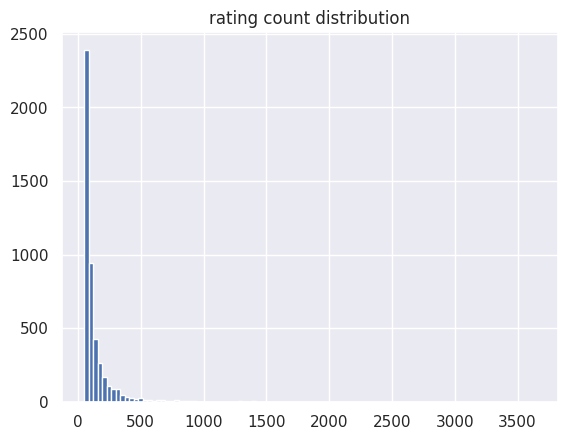

In [36]:
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

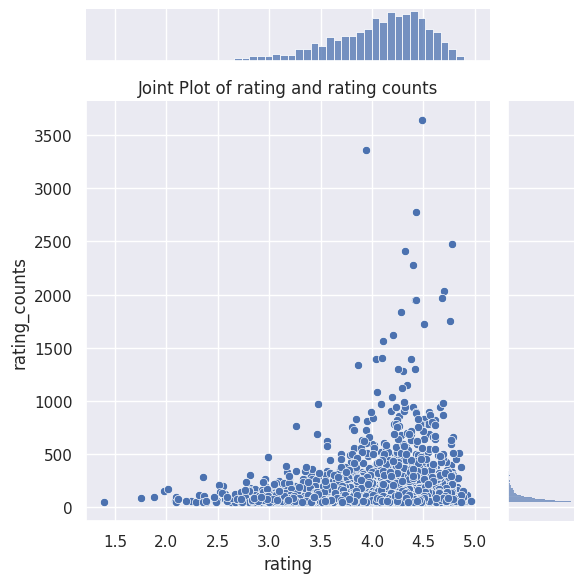

In [37]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

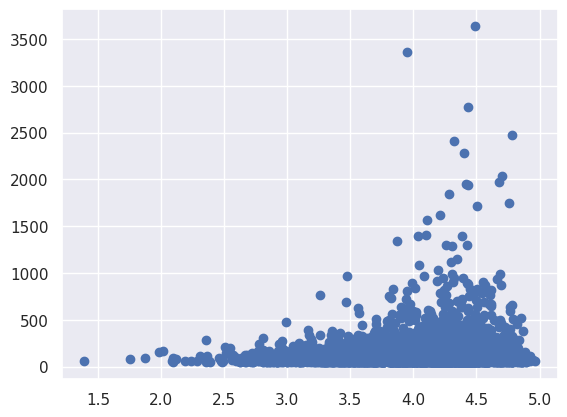

In [38]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [39]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.11671703900979784 


In [40]:
#import surprise library for collebrative filtering
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


surprise is not installed. Installing...


Collecting surprise

Downloading surprise-0.1-py2.py3-none-any.whl (1.8 kB)

Collecting scikit-surprise (from surprise)

Downloading scikit-surprise-1.1.3.tar.gz (771 kB)

Output()

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Requirement already satisfied: joblib>=1.0.0 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.3.2)

Requirement already satisfied: numpy>=1.17.3 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.23.5)

Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.10/dist-packages (from scikit-surprise->surprise) (1.11.4)

Building wheels for collected packages: scikit-surprise

Building wheel for scikit-surprise (setup.py): started

Building wheel for scikit-surprise (setup.py): finished with status 'done'

Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162681 sha256=1908e5893591607b4855602ba3d6403ca226818cd52337de28fd51e45ab94489

Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445

Successfully built scikit-surprise

Installing collected packages: scikit-surprise, surprise

Successfully installed scikit-surprise-1.1.3 surprise-0.1

In [41]:
reader = Reader(rating_scale=(1, 5))
surprise_data = Dataset.load_from_df(data,reader)

In [42]:
trainset, testset = train_test_split(surprise_data, test_size=0.3,random_state=42)

In [43]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [44]:
test_pred=algo.test(testset)

In [45]:
print("Item-based Model : Test Set")
accuracy.rmse(test_pred ,verbose=True)

Item-based Model : Test Set
RMSE: 1.3118


1.311817275268194

In [46]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400532655,1400599997,B00000DM9W,B00000J061,B00000J1V5,B00000JI4F,B00000K135,B00000K2YR,B00001P4XA,...,B00HVLUR86,B00HWMPRKW,B00I2VIR2M,B00I2ZBD1U,B00I94IPTW,B00IF70QCW,B00INNP5VU,B00IO1V33U,B00ISGCAJM,B00IVPU786
userId,,,,,,,,,,,,,,,,,,,,,
A002145212T9JG4UKUQW4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01044891E81FG2U1NYIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02459613IS599WTHNWWS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0263994QBSZJDIHLWE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03771633CA9VJG94SGFG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
ratings_matrix.shape

(19887, 4391)

In [48]:
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A002145212T9JG4UKUQW4,A01044891E81FG2U1NYIL,A02459613IS599WTHNWWS,A0263994QBSZJDIHLWE,A03771633CA9VJG94SGFG,A04219002183JS4995RFX,A04395542SO5YS6VXM81Z,A072216914N26EMZWP16J,A0759107CA9MPWVRF6VN,A0774804391MSQT4MXJDK,...,AZY40CHBQHLLN,AZY4E1MC6QPSM,AZYHJ6BXUG733,AZYQRMH8LLU8J,AZYX97NZCOHB6,AZZ6ZB9CQKQMJ,AZZM4GKA2WUZ4,AZZMXN7IV7LOW,AZZUCZGO7P9HH,AZZV9PDNMCOZW
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000DM9W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B00000J061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
x_ratings_matrix.shape

(4391, 19887)

In [50]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(4391, 10)

In [51]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4391, 4391)

In [52]:
x_ratings_matrix.index[10]

'B00001P4XH'

In [53]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

11


In [54]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(4391,)

In [55]:
correlation_matrix[correlation_product_ID>0.75].shape

(981, 4391)

In [56]:
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['B00000DM9W',
 'B00000J061',
 'B00001P4XA',
 'B00001P4ZH',
 'B00004THCZ',
 'B00004Z0C7',
 'B00004Z5PY',
 'B000058AKE',
 'B00005T39Y',
 'B00005TQ08',
 'B000063574',
 'B000068O16',
 'B000068O3C',
 'B000069EUW',
 'B00006B7DA',
 'B00006B7DB',
 'B00006B9CR',
 'B00006HOKR',
 'B00006I53S',
 'B00006I5J7']